In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
traindf =  pd.read_csv('train.csv', encoding='cp1252')

traindf

C:\Users\tonny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


### Checking the information of our train file

In [3]:
traindf.info()
# violation_zip_code column has no data, its all ull
# non_us__str_code column has only three entries
# graffiti_status column has only one entry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

### Data Cleaning

In [4]:
#define a new variable train2 that has columns arranged in order. 
#duplicate the agency name column
train2 = traindf[['ticket_id', 'agency_name', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance']]

In [5]:
#change the second agency name column to agency number
train2.columns = ['ticket_id', 'agency_name', 'agency_number', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance']


In [6]:
#Create a dictonary with our agencies and assign corresponding digit values
di = {"Buildings, Safety Engineering & Env Department" : 1,
      "Health Department" : 2,
      "Department of Public Works" : 3,
      "Detroit Police Department" : 4,
      "Neighborhood City Halls" : 5}
#replace the agency names with corresponding agency digits
train_ag = train2.replace({"agency_number": di})
train_ag

,ticket_id,agency_name,agency_number,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department",1,"Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [7]:
#read test data and repeat the cleaning process
testdf = pd.read_csv('test.csv')
test2 = testdf[['ticket_id', 'agency_name', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status']]
test2.columns = ['ticket_id', 'agency_name', 'agency_number', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status']

di = {"Buildings, Safety Engineering & Env Department" : 1,
      "Health Department" : 2,
      "Department of Public Works" : 3,
      "Detroit Police Department" : 4,
      "Neighborhood City Halls" : 5}
test_ag = test2.replace({"agency_number": di})
test_ag

,ticket_id,agency_name,agency_number,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,3,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,3,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,3,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,3,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,3,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60996,376496,"Buildings, Safety Engineering & Env Department",1,"Pierson, Kevin",THE AIC GROUP,12032.0,SANTA ROSA,48204,P.O. BO,969,...,Fail to comply with an Emergency or imminent d...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
60997,376497,"Buildings, Safety Engineering & Env Department",1,"Pierson, Kevin",THE AIC GROUP,12032.0,SANTA ROSA,48204,P.O. BO,969,...,Fail to comply with an Emergency or imminent d...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
60998,376499,Detroit Police Department,4,"BOWLES, TIFFANI","BARLOW, CHRISTOPHER D",11832.0,KILBOURNE,48213,11832,KILBOURNE,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
60999,376500,Detroit Police Department,4,"BOWLES, TIFFANI","WILLIAMS, JASON",11848.0,KILBOURNE,48213,4317,YORKSHIRE,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [8]:
# checking the number of columns in train and test data sets
print('There are ' + str(len(traindf.columns)) + ' Columns in our train.csv file ')
print(traindf.columns)
print('There are ' + str(len(testdf.columns)) + ' Columns in our test.csv file ')
print(testdf.columns)

There are 34 Columns in our train.csv file 
Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')
There are 27 Columns in our test.csv file 
Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name

In [9]:
traindf2 = traindf[['ticket_id', 'agency_name', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status']]
traindf2.columns = ['ticket_id', 'agency_name', 'agency_name1', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status']
traindf_ag = traindf2.replace({"agency_name1": di})
traindf_ag

,ticket_id,agency_name,agency_name1,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,22056,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,...,Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN
1,27586,"Buildings, Safety Engineering & Env Department",1,"Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,...,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NaN
2,22062,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,...,Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,22084,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,...,Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,22093,"Buildings, Safety Engineering & Env Department",1,"Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,...,Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,...,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
250302,325557,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,...,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
250303,325562,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,...,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
250304,325559,"Buildings, Safety Engineering & Env Department",1,"Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,...,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
testdf2 = testdf[['ticket_id', 'agency_name', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status']]
testdf2.columns = ['ticket_id', 'agency_name', 'agency_name1', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status']
testdf_ag = testdf2.replace({"agency_name1": di})
testdf_ag

,ticket_id,agency_name,agency_name1,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,3,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,3,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,3,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,3,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,3,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60996,376496,"Buildings, Safety Engineering & Env Department",1,"Pierson, Kevin",THE AIC GROUP,12032.0,SANTA ROSA,48204,P.O. BO,969,...,Fail to comply with an Emergency or imminent d...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
60997,376497,"Buildings, Safety Engineering & Env Department",1,"Pierson, Kevin",THE AIC GROUP,12032.0,SANTA ROSA,48204,P.O. BO,969,...,Fail to comply with an Emergency or imminent d...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
60998,376499,Detroit Police Department,4,"BOWLES, TIFFANI","BARLOW, CHRISTOPHER D",11832.0,KILBOURNE,48213,11832,KILBOURNE,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
60999,376500,Detroit Police Department,4,"BOWLES, TIFFANI","WILLIAMS, JASON",11848.0,KILBOURNE,48213,4317,YORKSHIRE,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [11]:
#define training data that has all the data for our predicion.
#drop all rows in compliance column that are null, we want only to train our algorithm on labelled data
training_data = train_ag[['agency_number', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'compliance']].dropna() #train dataset only contains target values 1 and 0 
training_data

,agency_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance
0,1,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0
1,1,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0
5,1,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0
6,1,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0
7,1,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0
...,...,...,...,...,...,...,...,...,...
250278,3,200.0,20.0,10.0,20.0,0.0,0.0,250.0,0.0
250287,3,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,0.0
250288,3,500.0,20.0,10.0,50.0,0.0,0.0,580.0,0.0
250290,3,200.0,20.0,10.0,0.0,0.0,0.0,230.0,1.0


In [12]:
#define testing data that has all columns in training data except compliance
testing_data = test_ag[['agency_number', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount']].dropna()
testing_data # test data has the same distribution and same features as train data

,agency_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount
0,3,200.0,20.0,10.0,20.0,0.0,0.0,250.0
1,3,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0
2,3,100.0,20.0,10.0,10.0,0.0,0.0,140.0
3,3,200.0,20.0,10.0,20.0,0.0,0.0,250.0
4,3,100.0,20.0,10.0,10.0,0.0,0.0,140.0
...,...,...,...,...,...,...,...,...
60996,1,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0
60997,1,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0
60998,4,100.0,20.0,10.0,10.0,0.0,0.0,140.0
60999,4,100.0,20.0,10.0,10.0,0.0,0.0,140.0


### Data Visualization

<IPython.core.display.Javascript object>


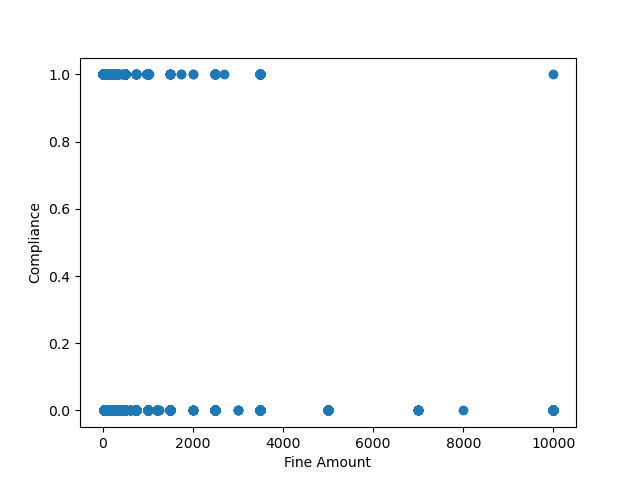

In [13]:
plt.figure()
plt.scatter( training_data['fine_amount'], training_data['compliance'])
plt.xlabel('Fine Amount')
plt.ylabel('Compliance')
plt.show()

<IPython.core.display.Javascript object>


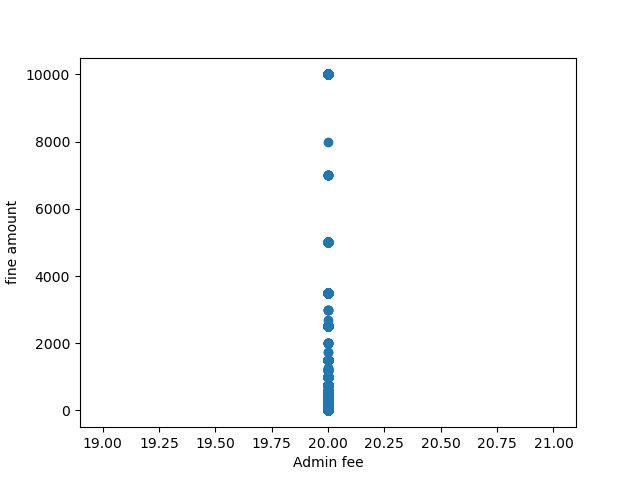

In [14]:
plt.figure()
plt.scatter(training_data['admin_fee'], training_data['fine_amount'])
plt.xlabel('Admin fee')
plt.ylabel('fine amount')
plt.show()

<IPython.core.display.Javascript object>


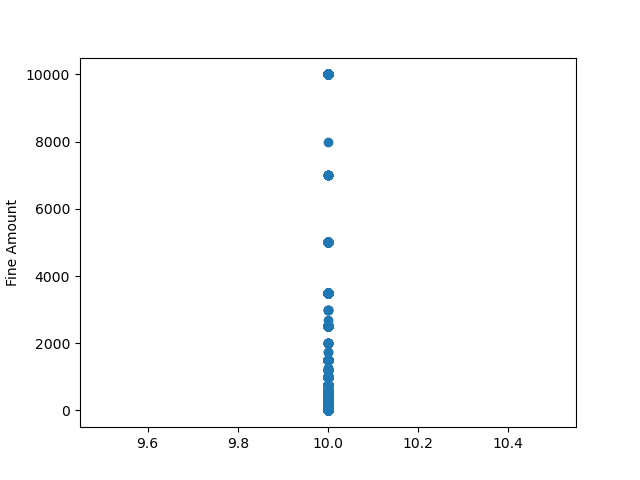

In [15]:
plt.figure()
plt.scatter(training_data['state_fee'], training_data['fine_amount'])
plt.ylabel('Fine Amount')
plt.show()

<IPython.core.display.Javascript object>


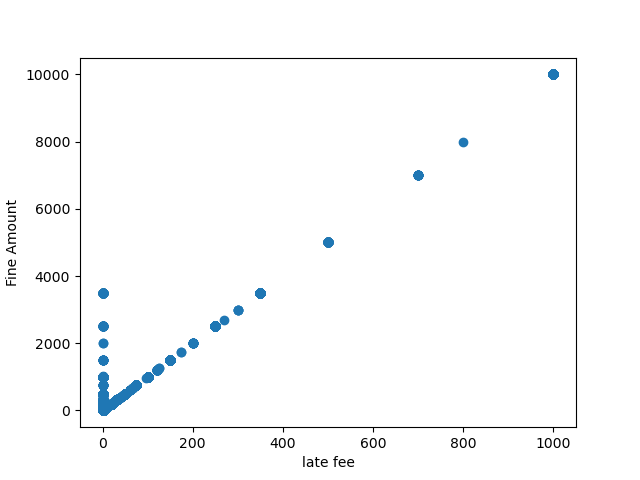

In [16]:
plt.figure()
plt.scatter(training_data['late_fee'], training_data['fine_amount'])
plt.ylabel('Fine Amount')
plt.xlabel('late fee')
plt.show()

<IPython.core.display.Javascript object>


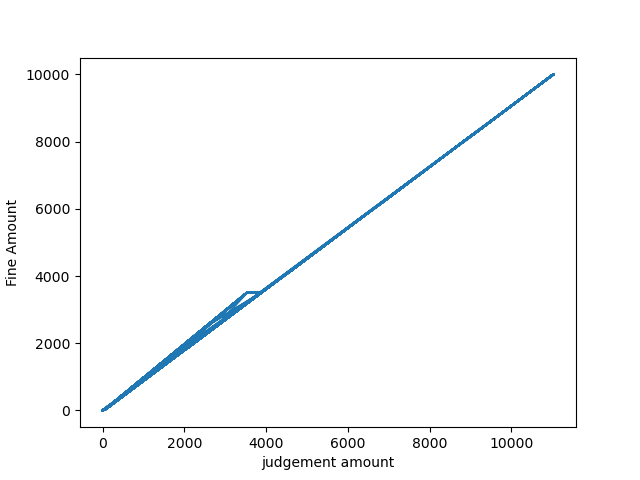

In [17]:
plt.figure()
plt.plot(training_data['judgment_amount'], training_data['fine_amount'])
plt.ylabel('Fine Amount')
plt.xlabel('judgement amount')
plt.show()

<IPython.core.display.Javascript object>


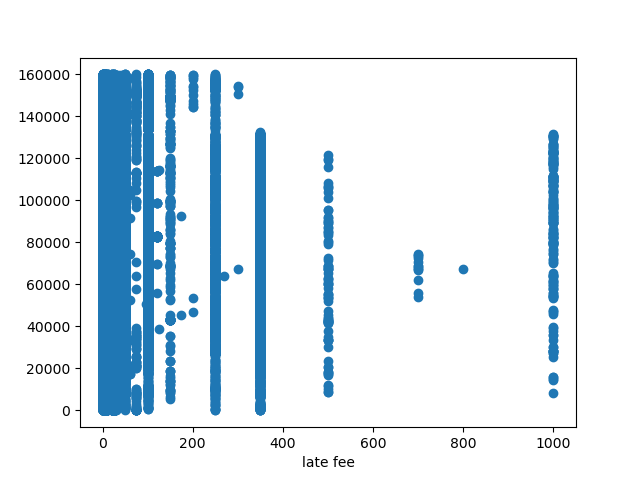

In [18]:
plt.figure()
plt.scatter(training_data['late_fee'], range(len(training_data['late_fee'])))
plt.xlabel('late fee')
plt.show()

<IPython.core.display.Javascript object>


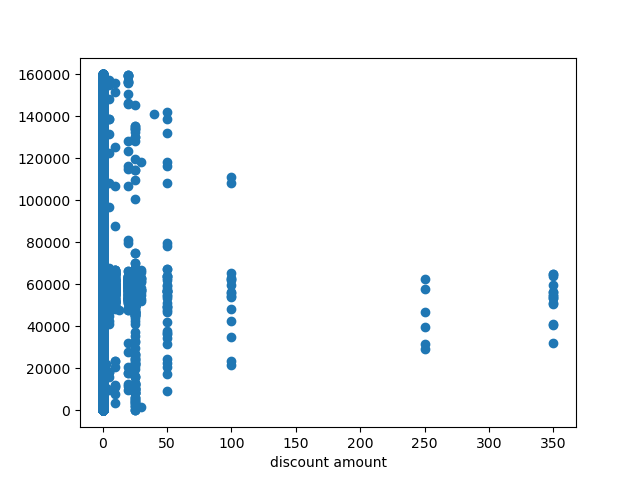

In [19]:
plt.figure()
plt.scatter(training_data['discount_amount'], range(len(training_data['discount_amount'])))
plt.xlabel('discount amount')
plt.show()

<IPython.core.display.Javascript object>


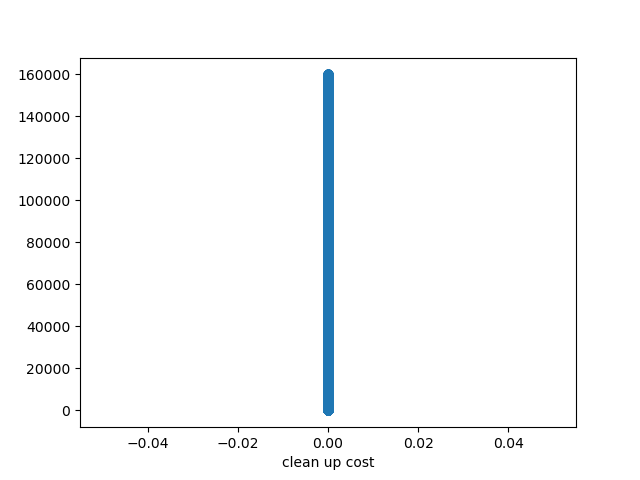

In [20]:
plt.figure()
plt.scatter(training_data['clean_up_cost'], range(len(training_data['clean_up_cost'])))
plt.xlabel('clean up cost')
plt.show()

<IPython.core.display.Javascript object>


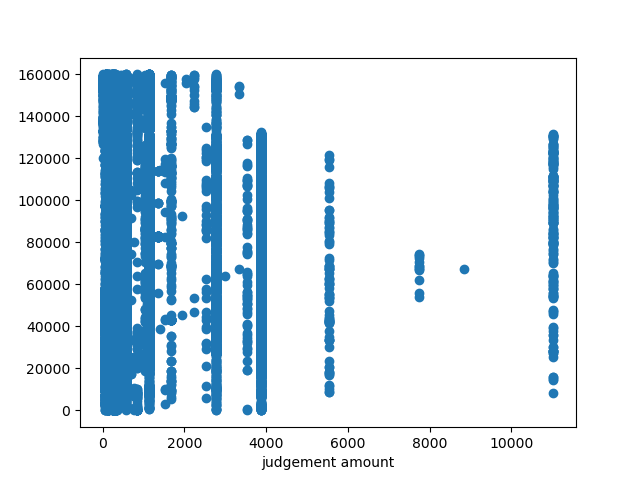

In [21]:
plt.figure()
plt.scatter(training_data['judgment_amount'], range(len(training_data['judgment_amount'])))
plt.xlabel('judgement amount')
plt.show()

### Feature Selection

In [22]:
#defining my y and X in the training data 
trainX = training_data[['agency_number', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount']]
trainy = training_data[['compliance']]
trainX

,agency_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount
0,1,250.0,20.0,10.0,25.0,0.0,0.0,305.0
1,1,750.0,20.0,10.0,75.0,0.0,0.0,855.0
5,1,250.0,20.0,10.0,25.0,0.0,0.0,305.0
6,1,750.0,20.0,10.0,75.0,0.0,0.0,855.0
7,1,100.0,20.0,10.0,10.0,0.0,0.0,140.0
...,...,...,...,...,...,...,...,...
250278,3,200.0,20.0,10.0,20.0,0.0,0.0,250.0
250287,3,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0
250288,3,500.0,20.0,10.0,50.0,0.0,0.0,580.0
250290,3,200.0,20.0,10.0,0.0,0.0,0.0,230.0


#### Fit a gradient boosting classifier and cheking its accuracy

In [23]:
#Importing gradient boosting classifier and perfoming a strip
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, random_state = 0)

clf = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())

print(f'Accuracy on training score : {clf.score(X_train, y_train):.5f}')
print(f'Accuracy on test score : {clf.score(X_test, y_test):.5f}')

Accuracy on training score : 0.93565
Accuracy on test score : 0.93460


In [24]:
#Evaluating model on Recall and Precision Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gbc_predicted = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, gbc_predicted):.5f}')
print(f'Precision: {precision_score(y_test, gbc_predicted):.5f}')
print(f'Recall: {recall_score(y_test, gbc_predicted):.5f}')
print(f'F1: {f1_score(y_test, gbc_predicted):.5f}')

Accuracy: 0.93460
Precision: 0.95130
Recall: 0.10131
F1: 0.18312


In [25]:
#perform cross validation and evaluate Gradient boosted model on aggregated scores
from sklearn.model_selection import cross_val_score

print(f'Cross-validation (accuracy) = {cross_val_score(clf, trainX, trainy.values.ravel(), cv = 5)}')
print(f'Cross-validation (AUC) = {cross_val_score(clf, trainX, trainy.values.ravel(), cv = 5, scoring = "roc_auc" )}')
print(f'cross-validation (recall) = {cross_val_score(clf, trainX, trainy.values.ravel(), cv = 5, scoring = "recall")}')

Cross-validation (accuracy) = [0.92963473 0.93998624 0.94436452 0.92807105 0.93463848]
Cross-validation (AUC) = [0.75291556 0.72031131 0.7866581  0.75206952 0.75588116]
cross-validation (recall) = [0.03277275 0.19361794 0.23501509 0.00905172 0.09956897]


<IPython.core.display.Javascript object>


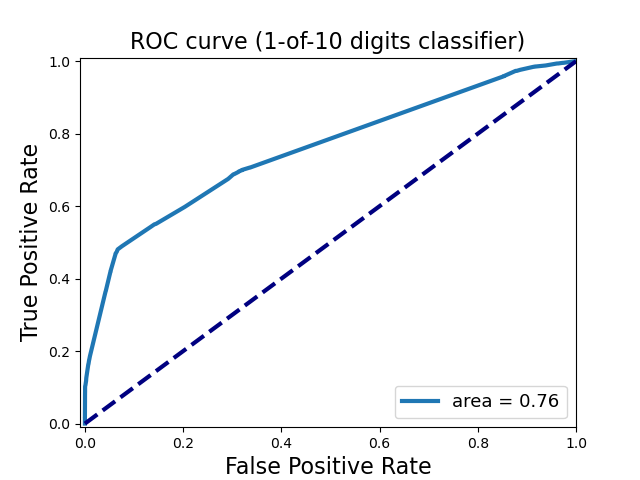

In [38]:
from sklearn.metrics import roc_curve, auc


y_score_lr = GradientBoostingClassifier().fit(X_train, y_train.values.ravel()).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='area = {:0.2f}'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

#### Fit a Random Forest classifier and checking its accuracy

In [27]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, random_state = 0)

clf1 = RandomForestClassifier().fit(X_train, y_train.values.ravel())

print(f'Accuracy on training score : {clf1.score(X_train, y_train):.5f}')
print(f'Accuracy on test score : {clf1.score(X_test, y_test):.5f}')

Accuracy on training score : 0.93575
Accuracy on test score : 0.93465


In [28]:
#Evaluating model on Recall and Precision Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gbc_predicted = clf1.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, gbc_predicted):.5f}')
print(f'Precision: {precision_score(y_test, gbc_predicted):.5f}')
print(f'Recall: {recall_score(y_test, gbc_predicted):.5f}')
print(f'F1: {f1_score(y_test, gbc_predicted):.5f}')

Accuracy: 0.93465
Precision: 0.94586
Recall: 0.10270
F1: 0.18528


In [29]:
#perform cross validation and evaluate Random Forest model on aggregated scores
from sklearn.model_selection import cross_val_score

print(f'Cross-validation (accuracy) = {cross_val_score(clf1, trainX, trainy.values.ravel(), cv = 5)}')
print(f'Cross-validation (AUC) = {cross_val_score(clf1, trainX, trainy.values.ravel(), cv = 5, scoring = "roc_auc" )}')
print(f'cross-validation (recall) = {cross_val_score(clf1, trainX, trainy.values.ravel(), cv = 5, scoring = "recall")}')

Cross-validation (accuracy) = [0.92950963 0.9397986  0.94423943 0.92816487 0.93460721]
Cross-validation (AUC) = [0.74247158 0.7124695  0.7873699  0.75008885 0.75127161]
cross-validation (recall) = [0.03406641 0.19534282 0.23717119 0.00991379 0.10172414]


#### fit a Decision Tree classifier and check its accuracy

In [30]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, random_state = 0)

clf2 = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())

print(f'Accuracy on training score : {clf2.score(X_train, y_train):.5f}')
print(f'Accuracy on test score : {clf2.score(X_test, y_test):.5f}')

Accuracy on training score : 0.93575
Accuracy on test score : 0.93465


In [31]:
#Evaluating model on Recall and Precision Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gbc_predicted = clf2.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, gbc_predicted):.5f}')
print(f'Precision: {precision_score(y_test, gbc_predicted):.5f}')
print(f'Recall: {recall_score(y_test, gbc_predicted):.5f}')
print(f'F1: {f1_score(y_test, gbc_predicted):.5f}')

Accuracy: 0.93465
Precision: 0.95161
Recall: 0.10201
F1: 0.18426


In [32]:
#perform cross validation and evaluate Decision tree model on aggregated scores
from sklearn.model_selection import cross_val_score

print(f'Cross-validation (accuracy) = {cross_val_score(clf2, trainX, trainy.values.ravel(), cv = 5)}')
print(f'Cross-validation (AUC) = {cross_val_score(clf2, trainX, trainy.values.ravel(), cv = 5, scoring = "roc_auc" )}')
print(f'cross-validation (recall) = {cross_val_score(clf2, trainX, trainy.values.ravel(), cv = 5, scoring = "recall")}')

Cross-validation (accuracy) = [0.92954091 0.93976733 0.94414561 0.92816487 0.93438829]
Cross-validation (AUC) = [0.74135786 0.71007216 0.78608809 0.7495817  0.74715425]
cross-validation (recall) = [0.03191031 0.19534282 0.23587753 0.00991379 0.0987069 ]


#### Fit a logistic Regression model and check its accuracy

In [33]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, random_state = 0)

clf3 = LogisticRegression().fit(X_train, y_train.values.ravel())

print(f'Accuracy on training score : {clf3.score(X_train, y_train):.5f}')
print(f'Accuracy on test score : {clf3.score(X_test, y_test):.5f}')

Accuracy on training score : 0.93391
Accuracy on test score : 0.93262


In [34]:
#Evaluating model on Recall and Precision Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gbc_predicted = clf3.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, gbc_predicted):.5f}')
print(f'Precision: {precision_score(y_test, gbc_predicted):.5f}')
print(f'Recall: {recall_score(y_test, gbc_predicted):.5f}')
print(f'F1: {f1_score(y_test, gbc_predicted):.5f}')

Accuracy: 0.93262
Precision: 0.74092
Recall: 0.10581
F1: 0.18517


In [35]:
#perform cross validation and evaluate logistic regression model on aggregated scores
from sklearn.model_selection import cross_val_score

print(f'Cross-validation (accuracy) = {cross_val_score(clf3, trainX, trainy.values.ravel(), cv = 5)}')
print(f'Cross-validation (AUC) = {cross_val_score(clf3, trainX, trainy.values.ravel(), cv = 5, scoring = "roc_auc" )}')
print(f'cross-validation (recall) = {cross_val_score(clf3, trainX, trainy.values.ravel(), cv = 5, scoring = "recall")}')

Cross-validation (accuracy) = [0.9291969  0.93857893 0.94151864 0.9276645  0.92722667]
Cross-validation (AUC) = [0.74558217 0.7286394  0.78346951 0.74566405 0.75160189]
cross-validation (recall) = [0.03147909 0.19232428 0.22854679 0.04741379 0.02327586]


<IPython.core.display.Javascript object>


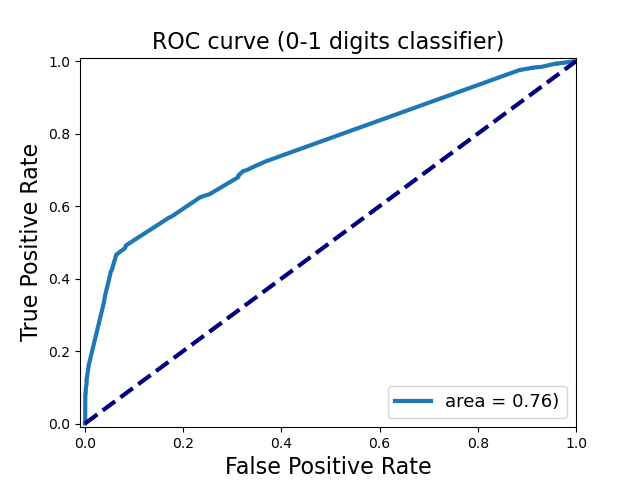

In [37]:
from sklearn.metrics import roc_curve, auc


y_score_lr = LogisticRegression().fit(X_train, y_train.values.ravel()).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (0-1 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

- On the basis of precision score of 0.95161, Decision Tree Classifier fits the data better than other algorithms. 
- The model has an accuracy score of 0.93575 on the training data and 0.93465 on the test data.
- The model does not underfit or overfit the data.
- Decision Tree Classifier is the best predictive model